# Analysing homophily based on two different null models

**Authors**: Andreas Kruff, Johann Schaible, Marcos Oliveira

**Version**: 20.04.2020

**Description**: To analyze the connectivity of a group of persons (at a conference) for example, this package offers you the possibility to apply two different null models.

## Table of Contents
#### [Create network graphs from Data object](#network_from_data)
#### [Apply Configuration model on a network](#configuration_model)
#### [Plotting histogram for the null model](#histogram)
#### [Apply null model with randomized identities](#null_model)
#### [Plotting a heatmap from contact matrix](#plot_heatmap)

The cell below can be ignored, after being executed once. The path has to be set to the directory above to get access to the data and the functions of this toolbox.

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from face2face.imports.load_all_data import Data

df = Data("WS16")

## Apply Configuration Model on a network
<a name="configuration_model"></a>

The configuration model also known as the Sneppen-Maslov rewiring is a null model. A null model is a model which is based on a certain hypothesis about the interaction behaviour for example, which then needs to be tested by statistical methods. 

Configuration model:
- randomized connections/links for the participants/nodes
- amount of contact from a person stays the same/ node degree stays the same
- (amount of contacts between two individuals/link weights get redistributed) 

In this case the null model all connections between the participants become randomized while every participant still has the same amount of contacts. This null model allows us to compare original scenario with a scenario where the participants behave the same in terms of their connectivity, but with randomized contacts. So we can check if two different groups are more or less connected which each other. If you want to learn more about the methods you can have a look at this paper:

**Génois, Mathieu & Zens, Maria & Lechner, Clemens & Rammstedt, Beatrice & Strohmaier, Markus. (2019). Building connections: How scientists meet each other during a conference.**

If you want to apply the Configuration model on the data set you can use the function "configuration_model_label_z_score_mixing_matrix" and you get the contact matrix with the z-scores.
The function has a total of seven parameters. At first you need an object from type "Data". The more often you execute the function based on the "runs" parameter, the better the result should be in the end, because it is an heuristic approach. With the label parameter you can choose for which attribute you want to apply the null model. 
With the "shuffle_label" parameter you can extend the model by randomizing the peoples attributes. The "force_simple_graph"-parameter allows us to delete self edges which occur when we use the "configuration_model" function from networkx.

There are two additional (optional) input parameter "seed_config_mat" and "seed_label". You can use them if you need fixed results from this function. The input parameters have to be lists with an integer for every run you want to apply.

In [4]:
from face2face.statistics.null_modell import configuration_model_label_z_score_mixing_matrix

contact_matrix, matrices , data_mixing_matrix, abs_matrices = configuration_model_label_z_score_mixing_matrix(df, runs=10, label="Education", shuffle_label=True, force_simple_graph=True)

contact_matrix

array([[ 0.3633047279117004,  1.5032629187523545,  0.8589162126595524,
         0.5043424334141935,  0.8359513767139961, -0.9918553395696895,
        -1.4514681750677962],
       [ 1.5032629187523545, -0.2976356838082376,  0.8962410498460434,
        -0.1548082504016627,  2.1171152295603903, -2.287012547012867 ,
        -2.1142326139321908],
       [ 0.8589162126595524,  0.8962410498460434,  2.620101630484884 ,
         1.5220858874961238,  0.7394731633108697, -3.6113917519346845,
        -2.3578981615911263],
       [ 0.5043424334141935, -0.1548082504016627,  1.5220858874961238,
        -0.0401629706069218,  1.9001595621315277, -1.6565393616505177,
        -1.1831001938432426],
       [ 0.8359513767139961,  2.1171152295603903,  0.7394731633108697,
         1.9001595621315277,  0.6607353509001211, -0.2878552887911913,
        -0.4783389689868116],
       [-0.9918553395696895, -2.287012547012867 , -3.6113917519346845,
        -1.6565393616505177, -0.2878552887911913, -1.4345358453613088

The Configuration Model allows us to analyze if two different groups are significantly more or less connected with each other then with other groups, because we keep the same individual behaviour in connectivity, but we randomize the connections between the people. The most relevant output for you as a user is the contact_matrix. This array contains the z-score combinations based on the label attribute you have choosen as the input parameter. The z-score describes positive and negative deviations as the amount of standard deviations $\sigma$ from the mean. For the connectivity we compare the link density with regard to the attribute label. What we get is a symmetric matrix with the same x and y axis order so on the diagonal we compare the connectivity within the same group while the other values describe the connectivity between the people of two different groups. So a high positive value indicates a connectivity that is a lot higher then the average and a negative value indicates the opposite.

The other output parameters are more relevant for the underlying functions behind the calculation and for the plotting, so if you just want to calculate and plot the homophily you can ignore them.

## Plotting histogram for the null model
<a name="histogram"></a>

To visualize the contact matrix for a better comparison of the different expressions for the choosen label/attribute you can use the plot_null_model_subplots function. In the following figure you can see the overall z-score for the different combinations of expressions as a single darkgreen bar plot. The lightgreen bar plots show the amount of edges between the combinations. The input parameter are equal to the one from the null model functions. You just have to choose which null model you want to use by setting the model parameter. You can choose between "configuration_model" and "random_identities". If you choose "configuration_model" you can choose if you want to use the "shuffle_label" and the "force_simple_graph" parameter.

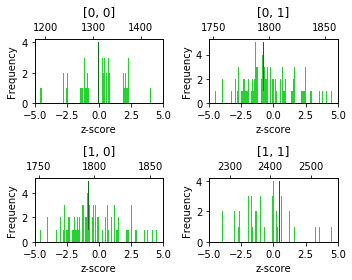

In [15]:
from face2face.visualization.plot_histogram_null_model import plot_null_model_subplots

plot_null_model_subplots(df, runs=100, label="Sex",shuffle_label=True, force_simple_graph=True, model="configuration_model")

## Apply null model with randomized identities
<a name="null_model"></a>

There is another null model you can apply on the dataset. The function is called "shuffle_label_z_score_mixing_matrix"
and you get the contact matrix with the z-scores as output. Except for the "shuffle_label" and the "force_simple_graph" parameter the parameters are the same.

Null model 2:
- randomizing the identities of the nodes/attributes of the participants
- network structure stays the same

If you want to learn more about the methods you can have a look at this paper:

**Génois, Mathieu & Zens, Maria & Lechner, Clemens & Rammstedt, Beatrice & Strohmaier, Markus. (2019). Building connections: How scientists meet each other during a conference.**

In this null model we want to compare if there are group pairs that significantly interact more or less when you keep the connectivity fixed, but you randomize the interactivity.

In [16]:
from face2face.statistics.null_modell import shuffle_label_z_score_mixing_matrix
contact_matrix, abs_matrices = shuffle_label_z_score_mixing_matrix(df, runs=10,label="Education")

In [5]:
contact_matrix

array([[ 0.3633047279117004,  1.5032629187523545,  0.8589162126595524,
         0.5043424334141935,  0.8359513767139961, -0.9918553395696895,
        -1.4514681750677962],
       [ 1.5032629187523545, -0.2976356838082376,  0.8962410498460434,
        -0.1548082504016627,  2.1171152295603903, -2.287012547012867 ,
        -2.1142326139321908],
       [ 0.8589162126595524,  0.8962410498460434,  2.620101630484884 ,
         1.5220858874961238,  0.7394731633108697, -3.6113917519346845,
        -2.3578981615911263],
       [ 0.5043424334141935, -0.1548082504016627,  1.5220858874961238,
        -0.0401629706069218,  1.9001595621315277, -1.6565393616505177,
        -1.1831001938432426],
       [ 0.8359513767139961,  2.1171152295603903,  0.7394731633108697,
         1.9001595621315277,  0.6607353509001211, -0.2878552887911913,
        -0.4783389689868116],
       [-0.9918553395696895, -2.287012547012867 , -3.6113917519346845,
        -1.6565393616505177, -0.2878552887911913, -1.4345358453613088

With this null model you can analyze if the correlations between topology and interactions are groupdependant or not. The output can be interpreted in the same way as the one from the configuration model.

## Plotting a heatmap from contact matrix
<a name="plot_heatmap"></a>

To plot the contact matrix you can use the "plot_cm_heatmap" function.

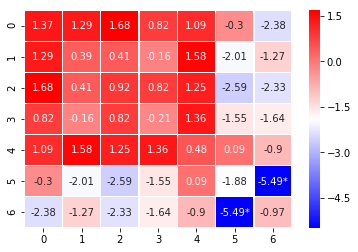

In [9]:
from face2face.visualization.plot_contact_matrix_heatmap import plot_cm_heatmap

plot_cm_heatmap(contact_matrix)

The heatmap visualization is based on the paper cited below:

Génois, Mathieu & Zens, Maria & Lechner, Clemens & Rammstedt, Beatrice & Strohmaier, Markus. (2019). Building connections: How scientists meet each other during a conference. 

The Heatmap shows the z-score between every value-attribute combination. Red fields indicate positive deviations, blue fields indicate negative deviations. Z-Scores which are labeled with a white * are significant under p < 0.01 (taking into account a Bonferroni Correction). Huge outliers are pretty rare, which shows that the value-attributes mix rather well in this case.